In [76]:
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

XGBoost stands for eXtreme Gradient Boosting

We'll deal with Titanic dataset again, this time with XGBClassifier

In [77]:
# read in the data
#url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
#titanic = pd.read_csv(url)
#titanic.head()
columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight",
           "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]
df = pd.read_csv("abalone.data", names=columns)

df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


- Survived: 0=died, 1=survived (response variable)
- Pclass: 1=first class, 2=second class, 3=third class
- Sex: female, male
- Age: numeric value
- Embarked: C = Cherbourg, Q = Queenstown, S = Southampton
- Fare: numeric value
- SibSp: numer of siblings on board
- Parch: number of parents on board

In [78]:
#titanic.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole Weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Numeric encoding of Sex Value

In [80]:
#titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
d = {'M': 0, 'F': 1, 'I': 2}
d_labels = ['M', 'F', 'I']

df["Sex"] = df["Sex"].apply(lambda x: d[x])
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# We dont need to fill missing data


In [81]:
#titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})
#titanic = pd.get_dummies(titanic, drop_first=True)
#titanic.head()

In [82]:
data = df.copy()
y = data['Sex']
X = data.drop('Sex', axis=1)

# Check the F to M/I ratio

In [83]:
100.0 * sum(y > 0) / len(y)

63.41872157050515

# Train the classifier

In [84]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

# Evaluate

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

# make predictions for data and evaluate
y_pred = model.predict(X)

class_report = classification_report( y, y_pred, target_names=d_labels)
print class_report

#accuracy = accuracy_score(y, y_pred)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

#from sklearn.metrics import average_precision_score
#average_precision = average_precision_score(y, y_pred)

#print('Average precision-recall score: {0:0.2f}'.format(
#      average_precision))

#from sklearn.metrics import roc_auc_score
#print('AUC: %f' % roc_auc_score(y, y_pred))

             precision    recall  f1-score   support

          M       0.55      0.69      0.61      1528
          F       0.65      0.37      0.47      1307
          I       0.73      0.82      0.77      1342

avg / total       0.64      0.63      0.62      4177



In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))
tn, fp, fn, tp = 0, 0, 0, 0

for matrix in [[0,1], [0,2], [1, 2]]:
    matrix_table = confusion_matrix(y, y_pred, labels=matrix).ravel()
    tn += matrix_table[0]
    fp += matrix_table[1]
    fn += matrix_table[2]
    tp += matrix_table[3]

print('Precision: %f' % (float(tp)/(tp + fp)))
print('Recal: %f' % (float(tp)/(tp + fn)))


[[1057  212  259]
 [ 670  481  156]
 [ 191   45 1106]]
[1057  212  259  670  481  156  191   45 1106]
Precision: 0.811145
Recal: 0.748263


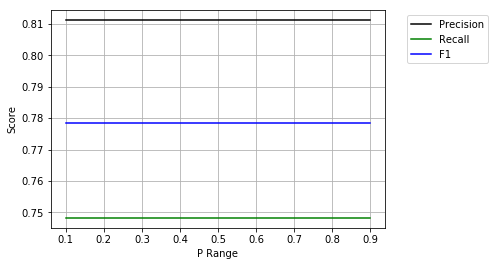

In [102]:
import numpy as np
p_range = np.arange(0.1, 1, 0.1) 
p_range
precisions = []
recalls = []
f1s = []
xgb = XGBClassifier()
xgb.fit(X, y)

pred = xgb.predict_proba(X)
for p in p_range:

    pred_tmp = pred[:, 1].copy()
    pred_tmp[pred_tmp > p] = 1
    pred_tmp[pred_tmp <= p] = 0
    #tn, fp, fn, tp = confusion_matrix(y, pred_tmp).ravel()
    #print tn, fp, fn, tp
    tn, fp, fn, tp = 0, 0, 0, 0

    for matrix in [[0,1], [0,2], [1, 2]]:
        matrix_table = confusion_matrix(y, y_pred, labels=matrix).ravel()
        tn += matrix_table[0]
        fp += matrix_table[1]
        fn += matrix_table[2]
        tp += matrix_table[3]

    try: prec = (float(tp)/(tp + fp))
    except: prec = 1
    
    try: rec = (float(tp)/(tp + fn))
    except: rec = 1
    
    try: f1 = 2 * prec * rec / (prec + rec)
    except: f1 = 1
    
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

# plot the results
plt.plot(p_range, precisions, 'k', label='Precision')
plt.plot(p_range, recalls, 'g', label='Recall')
plt.plot(p_range, f1s, 'b', label='F1')
plt.xlabel('P Range')
plt.ylabel('Score')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1))


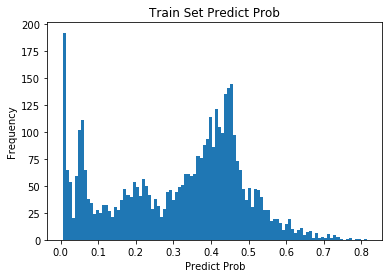

In [66]:
y_pred_prob = model.predict_proba(X)
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_pred_prob[:, 1], bins=100)
plt.title("Train Set Predict Prob")
plt.xlabel("Predict Prob")
plt.ylabel("Frequency")


20.0


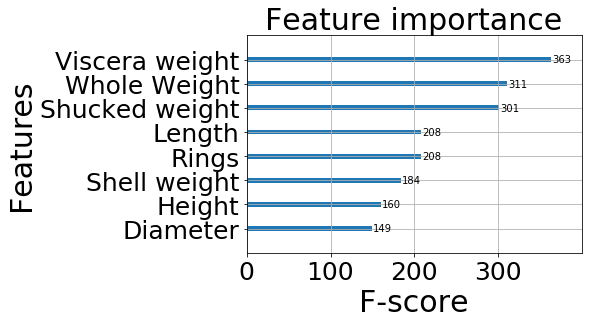

In [67]:
from xgboost import plot_importance
plot_importance(model)
plt.rcParams["font.size"] = 20
print(plt.rcParams["font.size"])
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('F-score', fontsize=30)
plt.ylabel('Features', fontsize=30)
plt.title('Feature importance', fontsize=30)
plt.show()

plt.rcParams["figure.figsize"] = [40, 40]


In [68]:
len(X.columns[np.where(model.feature_importances_>0)])

8

In [69]:
import numpy as np

def partial_dependency(model, X, features, selected_feature, floor):
    # The model could be an XGBoost sklearn fitted instance (or anything else with a 
    # predict method)
    X_temp = X.copy()
    grid = np.linspace(np.percentile(X_temp.loc[:, selected_feature], 0.1), 
                       np.percentile(X_temp.loc[:, selected_feature], 99.5), 
                       50)
    y_pred = np.zeros(len(grid))
    
    for i, val in enumerate(grid):
        X_temp.loc[:, selected_feature] = val
        p = model.predict_proba(X_temp.loc[:, features])[:, 1].mean()
        y_pred[i] = p
    return grid, y_pred

In [70]:
selected_names = X.columns[np.where(model.feature_importances_>0)]
feature_names = X.columns

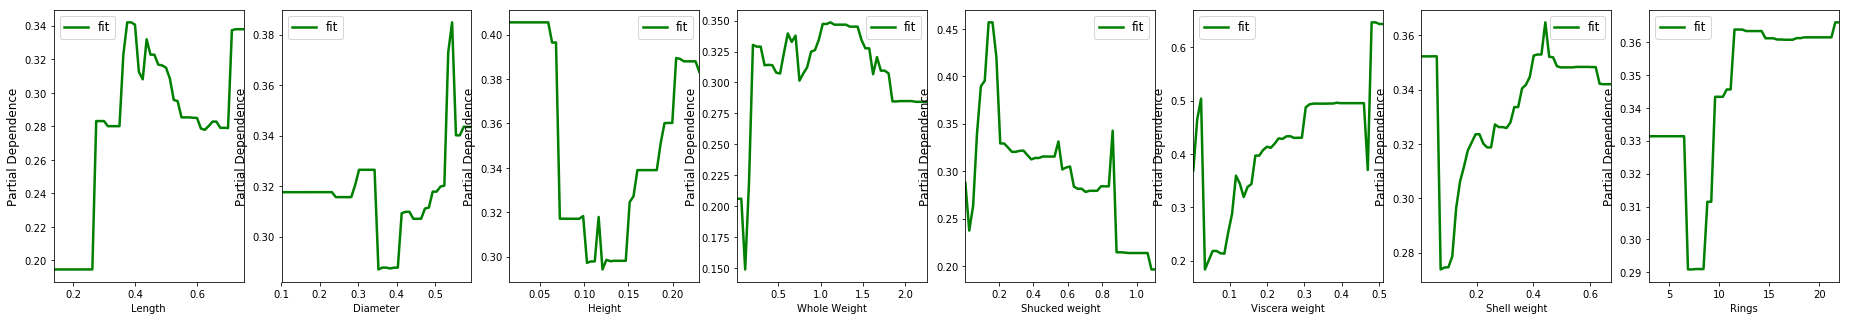

In [71]:
%matplotlib inline

fig, ax = plt.subplots(1, len(selected_names))
fig.set_size_inches(len(selected_names) * 4, 5)

y_pred_list = []
grid_list = []
for i, f in enumerate(selected_names):
    grid, y_pred = partial_dependency(model, X, feature_names, 
                                      f, 50)
    y_pred_list.append(y_pred)
    grid_list.append(grid)
    if i ==0 and len(feature_names) == 1:
        axis = ax
    else:
        axis = ax[i]
        
    axis.plot(grid, y_pred, '-', color = 'g', linewidth = 2.5, label='fit')
#     axis.plot(X.loc[:, f], y, 'o', color = 'grey', alpha = 0.01)
# 
    axis.set_xlim(min(grid), max(grid))
    axis.set_xlabel(f, fontsize = 10)
    axis.set_ylabel('Partial Dependence', fontsize = 12)
    
    handles, labels = axis.get_legend_handles_labels()
    axis.legend(handles, labels, loc = 'best', fontsize = 12)

    